#**Project Introduction**

Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello

#**Problem Statement**

We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech.

#**What is Speech Emotion Recognition (SER) and Why are we building this project?**

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

SER is tough because emotions are subjective and annotating audio is challenging.

**Why we need it?**

1. Emotion recognition is the part of speech recognition which is gaining more popularity and need for it increases enormously. Although there are methods to recognize emotion using machine learning techniques, this project attempts to use deep learning to recognize the emotions from data.

2. SER(Speech Emotion Recognition) is used in call center for classifying calls according to emotions and can be used as the performance parameter for conversational analysis thus identifying the unsatisfied customer, customer satisfaction and so on.. for helping companies improving their services.

3. It can also be used in-car board system based on information of the mental state of the driver can be provided to the system to initiate his/her safety preventing accidents to happen.

**Datasets used in this project**

1. Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
2. Surrey Audio-Visual Expressed Emotion (Savee)

#**1. Importing the required libraries**

In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Paths for data.
Ravdess = "/content/drive/MyDrive/speech-emotion-recognition-ravdess-data/"
Savee = "/content/drive/MyDrive/speech-emotion-recognition-savee-data/"

In [4]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/speech-emotion-recognit...
1,neutral,/content/drive/MyDrive/speech-emotion-recognit...
2,neutral,/content/drive/MyDrive/speech-emotion-recognit...
3,neutral,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...


In [5]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[0]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,surprise,/content/drive/MyDrive/speech-emotion-recognit...
1,surprise,/content/drive/MyDrive/speech-emotion-recognit...
2,surprise,/content/drive/MyDrive/speech-emotion-recognit...
3,surprise,/content/drive/MyDrive/speech-emotion-recognit...
4,surprise,/content/drive/MyDrive/speech-emotion-recognit...


In [6]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/drive/MyDrive/speech-emotion-recognit...
1,neutral,/content/drive/MyDrive/speech-emotion-recognit...
2,neutral,/content/drive/MyDrive/speech-emotion-recognit...
3,neutral,/content/drive/MyDrive/speech-emotion-recognit...
4,calm,/content/drive/MyDrive/speech-emotion-recognit...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


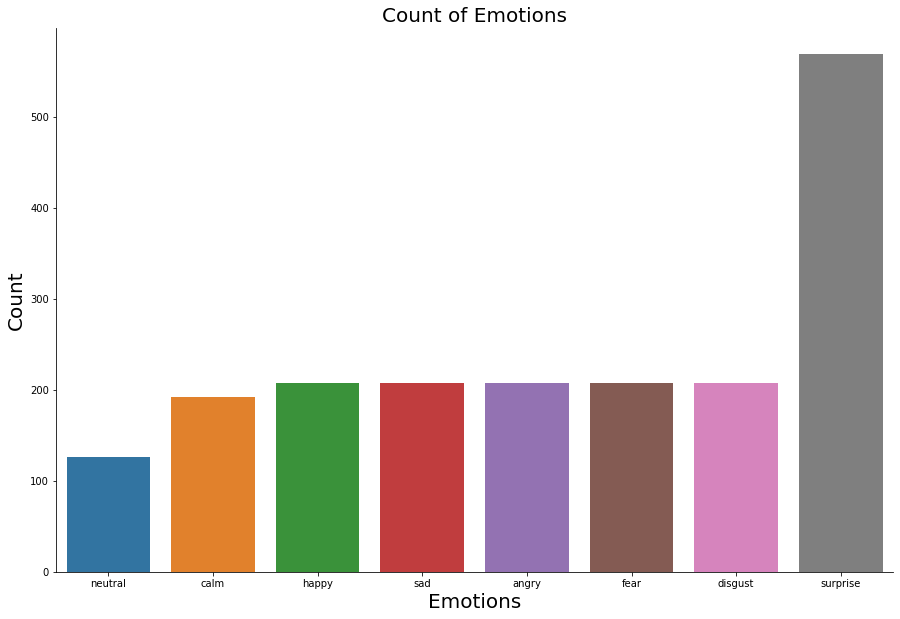

In [7]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,10
plt.title('Count of Emotions', size=20)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=20)
plt.xlabel('Emotions', size=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [8]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

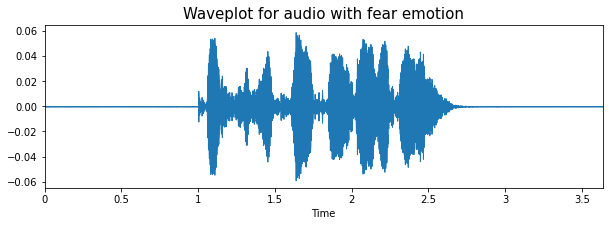

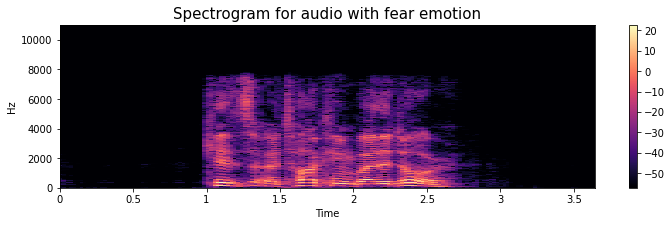

In [9]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

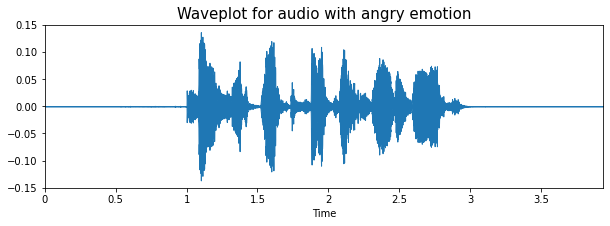

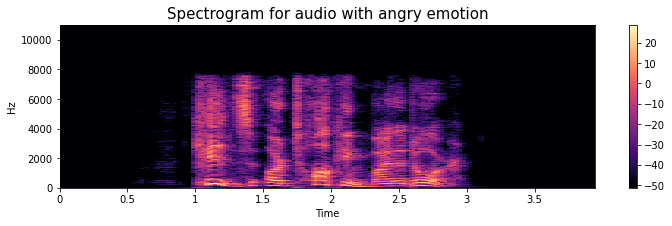

In [10]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

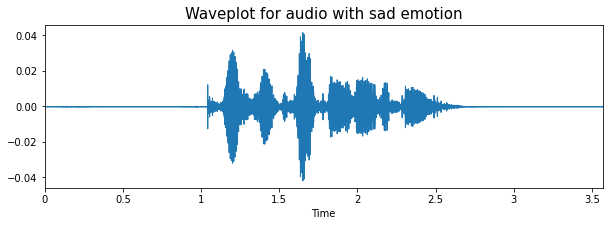

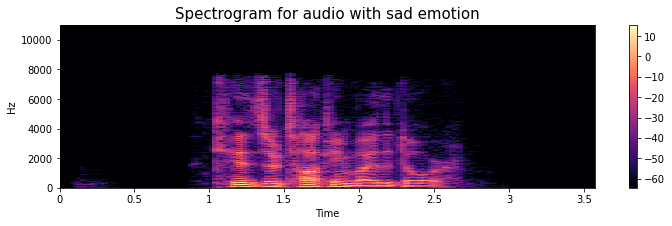

In [11]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

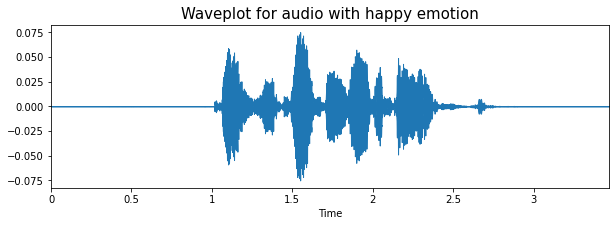

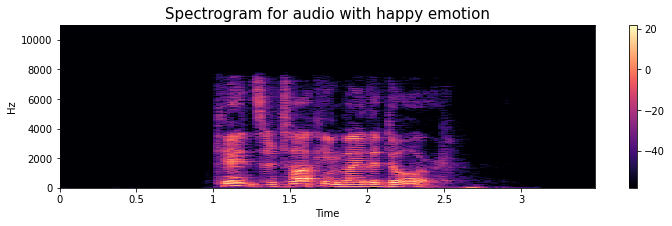

In [12]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [13]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

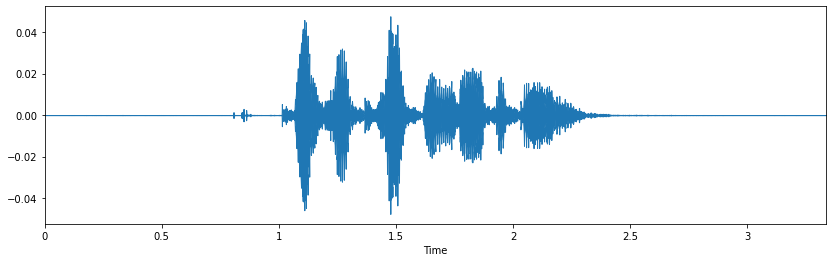

In [14]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

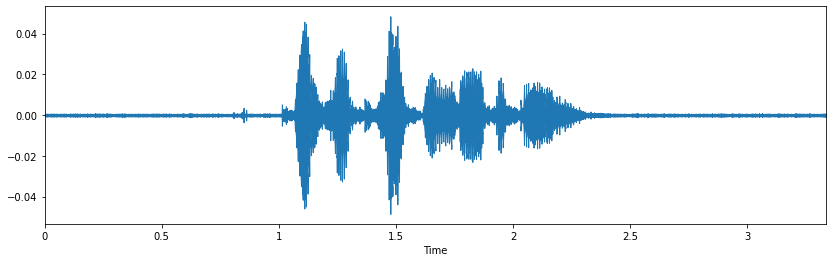

In [15]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

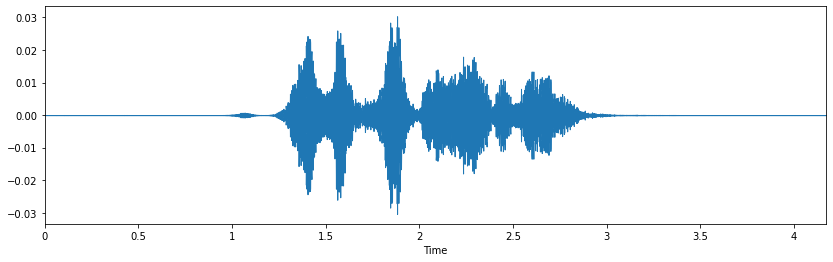

In [16]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [17]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [18]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [19]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,labels
0,0.192564,0.658022,0.711025,0.704244,0.707647,0.699569,0.658580,0.658836,0.711241,0.760990,0.753510,0.663456,0.622820,-652.773865,87.766060,-14.199620,27.933096,-4.658898,8.516932,-10.361979,-3.917370,-16.896605,-5.131097,0.519984,-6.230332,4.037431,-7.936316,-0.256154,-2.070076,-4.570291,-6.258249,1.056066,-0.766540,0.003657,4.118159e-06,0.000080,0.004503,0.028796,0.065495,0.020920,...,0.000081,0.000079,0.000142,0.000282,0.000483,0.000373,0.000471,0.001010,0.000769,0.000387,0.000264,0.000197,0.000128,0.000131,0.000116,0.000129,0.000154,0.000142,0.000083,0.000050,0.000027,0.000041,0.000029,0.000020,0.000011,2.282682e-06,7.945047e-08,2.132975e-10,1.349257e-14,2.046980e-16,1.700120e-16,1.754964e-16,1.352653e-16,1.149393e-16,1.312157e-16,1.201942e-16,1.393019e-16,1.438993e-16,1.280916e-16,neutral
1,0.297671,0.758903,0.818613,0.796678,0.789195,0.796243,0.708200,0.622691,0.683827,0.738477,0.743975,0.693435,0.697457,-477.052254,40.204137,7.099104,12.024506,2.083293,1.309405,-3.444872,-8.664404,-10.375171,-6.155037,-1.555636,-1.861721,0.126611,-3.137612,-1.879971,0.184755,-4.179194,-4.904310,0.275461,-1.553824,0.003899,2.302194e-05,0.000107,0.004522,0.028794,0.065762,0.021027,...,0.000098,0.000097,0.000158,0.000300,0.000501,0.000380,0.000486,0.001020,0.000772,0.000403,0.000279,0.000217,0.000149,0.000150,0.000136,0.000145,0.000168,0.000161,0.000102,0.000069,0.000042,0.000060,0.000046,0.000037,0.000029,2.069794e-05,1.831618e-05,1.841707e-05,1.817540e-05,1.706589e-05,1.752921e-05,1.739758e-05,1.815967e-05,1.886797e-05,1.797583e-05,1.896986e-05,1.770738e-05,1.848021e-05,1.829714e-05,neutral
2,0.156073,0.563747,0.685926,0.723997,0.656067,0.717811,0.678429,0.634608,0.662001,0.729249,0.755041,0.703490,0.612011,-704.707764,82.874840,-13.571262,25.772490,-7.074485,6.209885,-13.509771,-7.326396,-20.311552,-2.667936,-1.052210,-4.620356,1.720785,-8.639245,0.218641,-3.365223,-5.094011,-4.600798,3.337305,-4.128596,0.001698,5.607753e-07,0.000016,0.000626,0.003462,0.005958,0.003791,...,0.000021,0.000017,0.000010,0.000021,0.000042,0.000091,0.000107,0.000077,0.000121,0.000219,0.000079,0.000056,0.000055,0.000029,0.000017,0.000036,0.000026,0.000049,0.000038,0.000029,0.000015,0.000013,0.000007,0.000006,0.000005,3.630744e-06,2.090706e-06,1.594019e-07,1.461828e-09,5.628755e-12,2.849460e-12,2.335418e-12,2.388798e-12,2.307931e-12,1.764446e-12,1.922725e-12,1.861691e-12,1.734024e-12,1.703554e-12,neutral
3,0.207284,0.649996,0.689978,0.661347,0.645627,0.683498,0.684929,0.679601,0.732510,0.756296,0.748121,0.699418,0.620724,-645.409851,87.810638,-17.773392,33.468960,-0.936478,8.191231,-9.919904,-3.311972,-18.590483,-2.199426,1.543794,-6.660094,3.893641,-8.572474,2.928271,-3.344517,-3.604978,-4.101902,-1.308776,-0.581940,0.003222,2.540618e-06,0.000106,0.004554,0.025016,0.068559,0.038696,...,0.000025,0.000015,0.000034,0.000074,0.000107,0.000066,0.000040,0.000048,0.000069,0.000083,0.000028,0.000028,0.000032,0.000029,0.000042,0.000045,0.000034,0.000021,0.000020,0.000008,0.000007,0.000006,0.000004,0.000007,0.000005,7.722464e-07,3.505045e-08,1.899768e-10,6.785340e-15,9.278748e-17,9.362395e-17,1.017879e-16,8.988049e-17,9.321180e-17,9.068552e-17,9.977286e-17,8.490875e-17,8.585167e-17,9.594946e-17,neutral
4,0.338890,0.770671,0.810140,0.840061,0.809246,0.812788,0.772725,0.667953,0.697235,0.745048,0.776824,0.779514,0.773702,-397.332592,21.217212,9.181583,9.066004,4.242062,-0.194882,-2.613959,-6.305535,-7.572710,-4.265317,-1.490203,-1.749462,-1.752511,-1.535481,-0.521424,-0.408818,-2.403246,-1.546830,-0.343775,-2.331544,0.004128,1.628359e-04,0.000305,0.004737,0.025432,0.069543,0.039177,...,0.000221,0.000201,0.000226,0.000276,0.000297,0.000263,0.000260,0.000230,0.000273,0.000301,0.000226,0.000224,0.0002

In [20]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [21]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [22]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4324, 162), (4324, 8), (1442, 162), (1442, 8))

In [23]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4324, 162), (4324, 8), (1442, 162), (1442, 8))

In [24]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4324, 162, 1), (4324, 8), (1442, 162, 1), (1442, 8))

In [25]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 81, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 128)           0

In [26]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/50
68/68 [==============================] - 35s 34ms/step - loss: 1.8472 - accuracy: 0.3120 - val_loss: 1.7069 - val_accuracy: 0.3294
Epoch 2/50
68/68 [==============================] - 2s 23ms/step - loss: 1.6644 - accuracy: 0.3393 - val_loss: 1.5753 - val_accuracy: 0.3509
Epoch 3/50
68/68 [==============================] - 1s 21ms/step - loss: 1.5751 - accuracy: 0.3793 - val_loss: 1.6066 - val_accuracy: 0.3606
Epoch 4/50
68/68 [==============================] - 1s 20ms/step - loss: 1.5307 - accuracy: 0.4017 - val_loss: 1.4748 - val_accuracy: 0.4411
Epoch 5/50
68/68 [==============================] - 1s 21ms/step - loss: 1.4883 - accuracy: 0.4267 - val_loss: 1.4279 - val_accuracy: 0.4542
Epoch 6/50
68/68 [==============================] - 1s 21ms/step - loss: 1.4324 - accuracy: 0.4466 - val_loss: 1.3796 - val_accuracy: 0.4840
Epoch 7/50
68/68 [==============================] - 1s 21ms/step - loss: 1.3931 - accuracy: 0.4639 - val_loss: 1.3809 - val_accuracy: 0.4674
Epoch 8/50
6

46/46 [==============================] - 1s 11ms/step - loss: 1.2033 - accuracy: 0.6512
Accuracy of our model on test data :  65.11788964271545 %


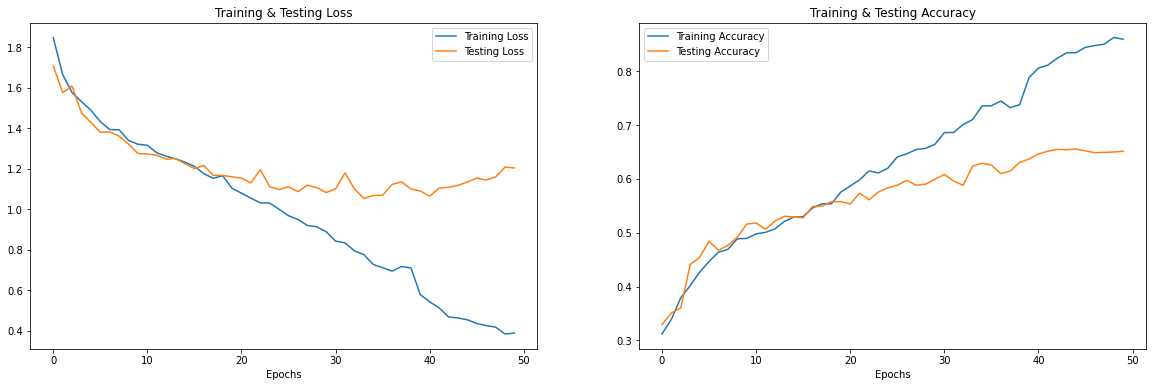

In [27]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [28]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [29]:
model_name = 'Speech_Emotion_Recognition_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/Speech_Emotion_Recognition_Model.h5 


In [30]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [36]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(20)

,Predicted Labels,Actual Labels
0,calm,calm
1,surprise,surprise
2,disgust,disgust
3,disgust,calm
4,surprise,surprise
5,surprise,surprise
6,fear,fear
7,sad,fear
8,surprise,surprise
9,sad,disgust


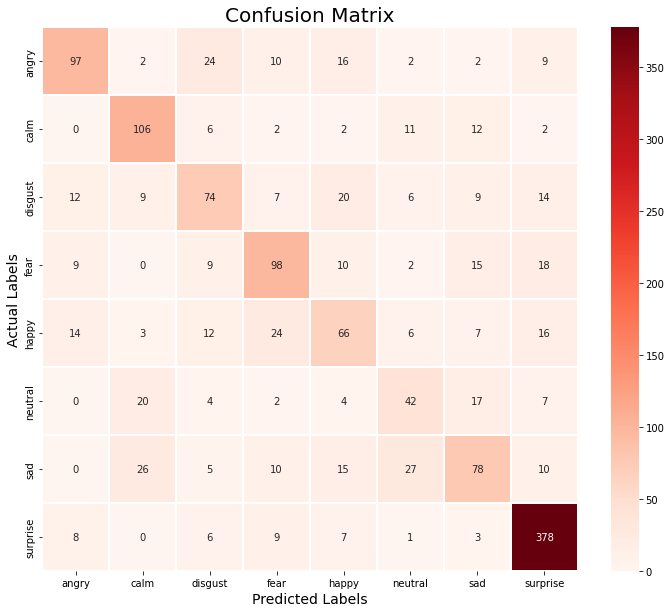

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Reds', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.69      0.60      0.64       162
        calm       0.64      0.75      0.69       141
     disgust       0.53      0.49      0.51       151
        fear       0.60      0.61      0.61       161
       happy       0.47      0.45      0.46       148
     neutral       0.43      0.44      0.44        96
         sad       0.55      0.46      0.50       171
    surprise       0.83      0.92      0.87       412

    accuracy                           0.65      1442
   macro avg       0.59      0.59      0.59      1442
weighted avg       0.64      0.65      0.65      1442

